# <center>**Predictive Models using Regression**

In [1]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

### OVERVIEW

In [2]:
# import dataset
customer = pd.read_csv('Customer.csv', sep =';')
product = pd.read_csv('Product.csv', sep =';')
store = pd.read_csv('Store.csv', sep =';')
transaction = pd.read_csv('Transaction.csv', sep =';')

In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


### DATA CLEANSING

##### **MISSING VALUES**

In [7]:
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [8]:
customer = customer.dropna(subset=['Marital Status'])
customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [9]:
product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [10]:
store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [11]:
transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

##### **Duplicate**

In [12]:
customer.duplicated().sum()

0

In [13]:
product.duplicated().sum()

0

In [14]:
store.duplicated().sum()

0

In [15]:
transaction.duplicated().sum()

0

### Merge the Data

In [16]:
#change data type
customer['Income'] = customer['Income']. replace('[,]','.', regex=True).astype('float')
store['Latitude'] = store['Latitude']. replace('[,]','.', regex=True).astype('float')
store['Longitude'] = store['Longitude']. replace('[,]','.', regex=True).astype('float')
transaction['Date'] = pd.to_datetime(transaction['Date'])

In [17]:
merged_cust_trans = pd.merge(transaction, customer, on=['CustomerID'])
merged_prod_trans = pd.merge(merged_cust_trans, product, on=['ProductID'])
merged_data = pd.merge(merged_prod_trans, store, on=['StoreID'])

merged_data.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [18]:
# rename column to lowercase 
for column in merged_data.columns:
    merged_data.rename(columns ={column: column.lower()}, inplace = True)
merged_data.rename(columns = {'marital status': 'marital_status'}, inplace = True)
merged_data.rename(columns = {'product name': 'product_name'}, inplace = True)
merged_data.sample(5)

,transactionid,customerid,date,productid,price_x,qty,totalamount,storeid,age,gender,marital_status,income,product_name,price_y,storename,groupstore,type,latitude,longitude
3817,TR58441,1,2022-06-25,P2,3200,7,22400,8,55,1,Married,5.12,Ginger Candy,3200,Sinar Harapan,Harapan Baru,General Trade,5.548290,95.323753
1333,TR25672,355,2022-05-26,P10,15000,3,45000,1,19,1,Single,0.00,Cheese Stick,15000,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
3543,TR14623,421,2022-03-03,P4,12000,5,60000,2,35,0,Married,9.01,Potato Chip,12000,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
4588,TR45300,351,2022-04-01,P6,18000,4,72000,11,45,1,Married,18.34,Cashew,18000,Sinar Harapan,Prestasi,General Trade,0.533505,101.447403
1376,TR12254,358,2022-08-19,P10,15000,5,75000,1,32,1,Married,3.20,Cheese Stick,15000,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666


In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 4975
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transactionid   4976 non-null   object        
 1   customerid      4976 non-null   int64         
 2   date            4976 non-null   datetime64[ns]
 3   productid       4976 non-null   object        
 4   price_x         4976 non-null   int64         
 5   qty             4976 non-null   int64         
 6   totalamount     4976 non-null   int64         
 7   storeid         4976 non-null   int64         
 8   age             4976 non-null   int64         
 9   gender          4976 non-null   int64         
 10  marital_status  4976 non-null   object        
 11  income          4976 non-null   float64       
 12  product_name    4976 non-null   object        
 13  price_y         4976 non-null   int64         
 14  storename       4976 non-null   object        
 15  grou

In [20]:
merged_data.isnull().sum()

transactionid     0
customerid        0
date              0
productid         0
price_x           0
qty               0
totalamount       0
storeid           0
age               0
gender            0
marital_status    0
income            0
product_name      0
price_y           0
storename         0
groupstore        0
type              0
latitude          0
longitude         0
dtype: int64

In [21]:
merged_data.duplicated().sum()

0

In [22]:
value_counts = merged_data['transactionid'].value_counts()
duplicate = value_counts[value_counts > 1]
print(duplicate)

TR71313    3
TR33585    2
TR19818    2
TR54394    2
TR79559    2
          ..
TR90952    2
TR43929    2
TR60853    2
TR38222    2
TR65271    2
Name: transactionid, Length: 109, dtype: int64


In [23]:
# Mengurutkan DataFrame berdasarkan kolom "date" secara menurun (descending)
merged_data.sort_values(by='date', ascending=False, inplace=True)
# Menghapus duplikat berdasarkan kolom "transaction id", hanya mempertahankan yang terbaru
merged_data.drop_duplicates(subset='transactionid', keep='first', inplace=True)

In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4866 entries, 2727 to 0
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transactionid   4866 non-null   object        
 1   customerid      4866 non-null   int64         
 2   date            4866 non-null   datetime64[ns]
 3   productid       4866 non-null   object        
 4   price_x         4866 non-null   int64         
 5   qty             4866 non-null   int64         
 6   totalamount     4866 non-null   int64         
 7   storeid         4866 non-null   int64         
 8   age             4866 non-null   int64         
 9   gender          4866 non-null   int64         
 10  marital_status  4866 non-null   object        
 11  income          4866 non-null   float64       
 12  product_name    4866 non-null   object        
 13  price_y         4866 non-null   int64         
 14  storename       4866 non-null   object        
 15  grou

In [25]:
merged_data.head()

,transactionid,customerid,date,productid,price_x,qty,totalamount,storeid,age,gender,marital_status,income,product_name,price_y,storename,groupstore,type,latitude,longitude
2727,TR13635,408,2022-12-31,P7,9400,4,37600,3,34,1,Married,9.45,Coffee Candy,9400,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
4666,TR38129,253,2022-12-31,P3,7500,5,37500,4,37,0,Married,4.32,Crackers,7500,Gita Ginara,Gita,General Trade,-6.966667,110.416664
2803,TR54423,243,2022-12-31,P10,15000,5,75000,3,38,0,Married,3.34,Cheese Stick,15000,Prima Kota,Prima,Modern Trade,-7.797068,110.370529
724,TR12821,203,2022-12-31,P3,7500,1,7500,10,53,0,Married,17.20,Crackers,7500,Harapan Baru,Harapan Baru,General Trade,3.597031,98.678513
2461,TR45899,232,2022-12-31,P6,18000,1,18000,9,62,0,Married,7.32,Cashew,18000,Lingga,Lingga,Modern Trade,-3.654703,128.190643


### **Prepare Data Frame for Time Series Regression**

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.metrics import mean_squared_error


In [27]:
forecast = merged_data.groupby('date').agg({'qty': 'sum'}).reset_index()
forecast

,date,qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


In [28]:
# Ubah indeks DataFrame menjadi kolom 'date'
forecast.set_index('date', inplace=True)

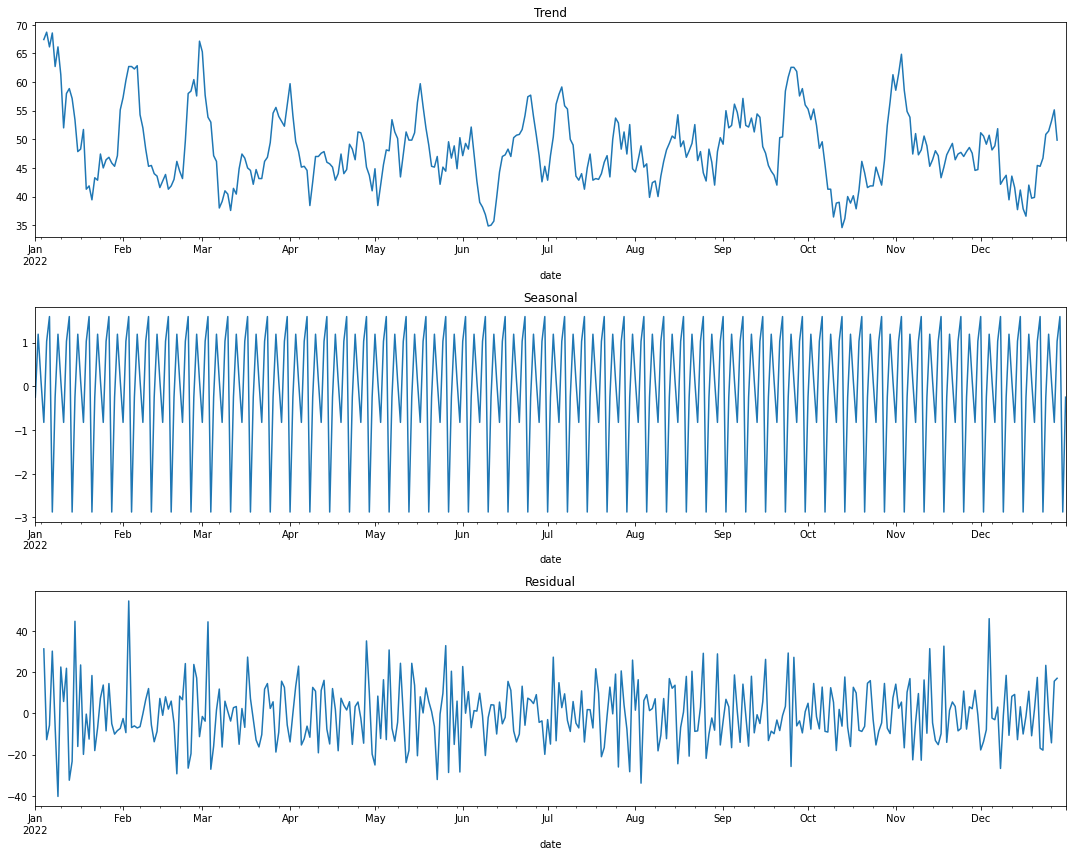

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(forecast)

fig,ax = plt.subplots(3,1,figsize=(15,12))
decompose.trend.plot(ax=ax[0])
ax[0].set_title('Trend')
decompose.seasonal.plot(ax=ax[1])
ax[1].set_title('Seasonal')
decompose.resid.plot(ax=ax[2])
ax[2].set_title('Residual')

plt.tight_layout()
plt.show()

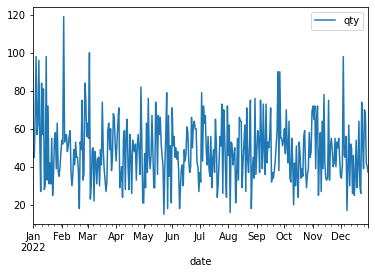

In [30]:
forecast.plot()
plt.show()


### Transform Data

In [31]:
#Transform data to log
forecast = np.log(forecast)
forecast.head()

,qty
date,
2022-01-01,3.850148
2022-01-02,3.806662
2022-01-03,4.204693
2022-01-04,4.584967
2022-01-05,4.043051


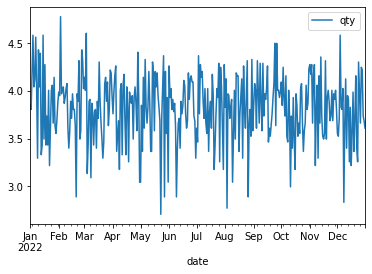

In [32]:
#
forecast.plot()
plt.show()

In [33]:
#Split train and test
df_train = forecast.iloc[:-31]
df_test = forecast.iloc[-31:]

### Test for stationarity

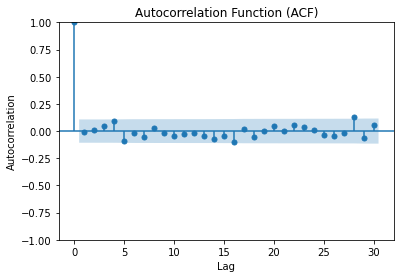

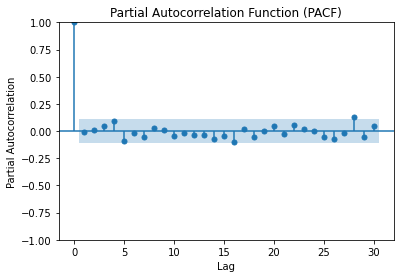

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF using default method
plot_acf(df_train, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF using ywm method
plot_pacf(df_train, lags=30,  method='ywm')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()



In [35]:
from statsmodels.tsa.stattools import adfuller
# Check dataset stationary or not
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 1.8454560509917793e-12


It can be seen that after conducting a check using the adfuller test, it shows that the P-value < 0.05. Therefore, the data is considered stationary and can be used for time series analysis with ARIMA.

## ARIMA Model for Predictions

### auto-fit ARIMA

In [36]:
import pmdarima as pm

auto_arima_model = pm.auto_arima(df_train['qty'], seasonal=False, stepwise=False, suppress_warnings=True, trace = True)
auto_arima_model.summary()

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1849.479, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1477.157, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=1206.566, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=1067.089, Time=0.10 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=942.955, Time=0.20 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=862.082, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.49 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=inf, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.48 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.57 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  334
Model:               SARIMAX(0, 0, 5)   Log Likelihood                -425.041
Date:                Sat, 02 Sep 2023   AIC                            862.082
Time:                        23:49:45   BIC                            884.949
Sample:                    01-01-2022   HQIC                           871.200
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.2556      0.056     22.401      0.000       1.146       1.365
ma.L2          1.3950      0.076     18.349      0.000       1.246       1.544
ma.L3          1.3161      0.077     17.112      0.000       1.165       1.467
ma.L4          1.0246      0.073     14.055      0.000       0.882       1.167
ma.L5          0.4595      0.053      8.618      0.000       0.355       0.564
sigma2         0.7376      0.070     10.565      0.000       0.601       0.874
===================================================================================
Ljung-Box (L1) (Q):                  76.58   Jarque-Bera (JB):                 1.74
Prob(Q):                              0.00   Prob(JB):                         0.42
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Manual parameter tuning

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

def tune(z,y,x):
    model = ARIMA(df_train, order=(x,y,z))
    model_fit = model.fit()
    forecast_test = model_fit.forecast(len(df_test))
    df_plot = forecast[['qty']].iloc[-61:]

    df_plot['forecast'] = [None]*(len(df_plot)-len(forecast_test)) + list(forecast_test)
    
    mae = mean_absolute_error(df_test, forecast_test)
    mape = mean_absolute_percentage_error(df_test, forecast_test)
    rmse = np.sqrt(mean_squared_error(df_test, forecast_test))
    
    return mae,mape,rmse
    
#Parameter combinations
pval = [50,60,70]
dval = [2]
qval = [1]

comb = []
for i in pval:
    for j in dval:
        for k in qval:
            comb.append((i,j,k))

param = []
mae_score = []
mape_score = []
rmse_score = []

for i in comb:
    param.append(i)
    score = tune(*i)
    mae_score.append(score[0])
    mape_score.append(score[1])
    rmse_score.append(score[2])
    
tuning_df = pd.DataFrame({'param':param,'mae':mae_score,'mape':mape_score,'rsme':rmse_score})
tuning_df.sort_values(by='mae').head(3)



,param,mae,mape,rsme
2,"(70, 2, 1)",0.308614,0.082682,0.394550
1,"(60, 2, 1)",0.326152,0.088450,0.412683
0,"(50, 2, 1)",0.363822,0.100386,0.440407


In [38]:
#Manual parameter tuning
model = ARIMA(df_train, order=(70, 2, 1))
model_fit = model.fit()

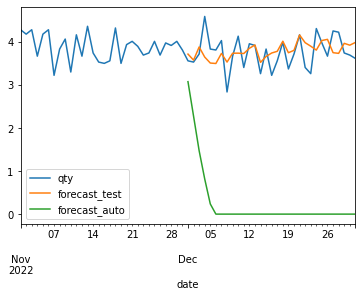

In [39]:
#plot forecasting
forecast_test = model_fit.forecast(len(df_test))
forecast_auto = auto_arima_model.predict(len(df_test))

df_plot = forecast[['qty']].iloc[-61:]

df_plot['forecast_test'] = [None]*(len(df_plot)-len(forecast_test)) + list(forecast_test)
df_plot['forecast_auto'] = [None]*(len(df_plot)-len(forecast_auto)) + list(forecast_auto)

df_plot.plot()
plt.show()

In [40]:
#Manual parameter tuning metrics

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {round(mae,4)}')
print(f'mape - manual: {round(mape,4)}')
print(f'rmse - manual: {round(rmse,4)}')

mae - manual: 0.3056
mape - manual: 0.0832
rmse - manual: 0.378


In [41]:
#Auto-fit ARIMA metrics

mae = mean_absolute_error(df_test, forecast_auto)
mape = mean_absolute_percentage_error(df_test, forecast_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_auto))

print(f'mae - auto: {round(mae,4)}')
print(f'mape - auto: {round(mape,4)}')
print(f'rmse - auto: {round(rmse,4)}')

mae - auto: 3.4921
mape - auto: 0.9308
rmse - auto: 3.5858


The performance of the manually tuned ARIMA model with specific parameters is significantly better than the results from the ARIMA model determined automatically by pmdarima. This is evident from the lower values of evaluation metrics, namely MAE, MAPE, and RMSE, which are smaller in the manually tuned model compared to the auto-fit model.

## Forecast Quantity with The Best Parameter for all products

In [42]:
#Apply model to forecast data
model = ARIMA(forecast, order=(70, 2, 1))
model_fit = model.fit()
Forecast = model_fit.forecast(steps=30)

In [43]:
#Re-trasnform data
df_fore = np.exp(forecast)
Forecast = np.exp(Forecast)

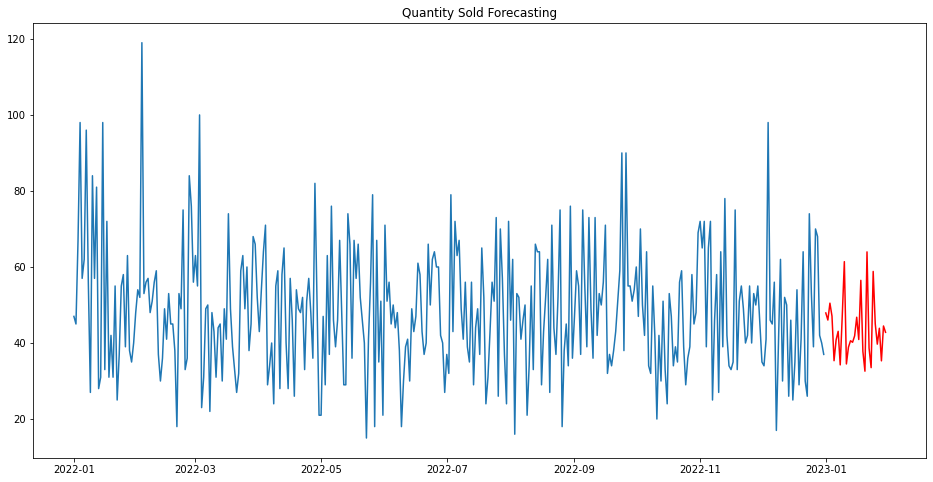

In [44]:
#Plot forecasting
plt.figure(figsize=(16,8))
plt.plot(df_fore)
plt.plot(Forecast,color='red')
plt.title('Quantity Sold Forecasting')
plt.show()

In [45]:
Forecast.mean()

43.68162173889366

From the above model results, it can be inferred that the average daily quantity of sales for January 2023 is approximately 44 pieces per day.

### Forecasting for Each Product

In [46]:
#Forecast for each product
list_prod = merged_data['product_name'].unique()

dfp = pd.DataFrame({'date':pd.date_range(start='2023-01-01',end='2023-01-30')})
dfp = dfp.set_index('date')
for i in list_prod:
    df2 = merged_data[['date','product_name','qty']]
    df2 = df2[df2['product_name']==i]
    df2= df2.groupby('date')[['qty']].sum()
    df2 = df2.reset_index()

    df3 = pd.DataFrame({'date':pd.date_range(start='2022-01-01',end='2022-12-31')})
    df3 = df3.merge(df2,how='left',on='date')
    df3 = df3.fillna(0)
    df3 = df3.set_index('date')

    model1 = ARIMA(df3, order=(70, 2, 1))
    model_fit1 = model1.fit()
    forecast1 = model_fit1.forecast(steps=30)
    dfp[i] = forecast1.values
    
dfp.head()

,Coffee Candy,Crackers,Cheese Stick,Cashew,Ginger Candy,Yoghurt,Oat,Choco Bar,Potato Chip,Thai Tea
date,,,,,,,,,,
2023-01-01,4.791088,4.130567,9.253413,1.666462,4.954588,3.590301,1.634844,3.341812,4.111647,6.433916
2023-01-02,3.875971,5.629637,1.000780,2.167722,6.173977,6.046925,3.123821,3.421883,4.321685,4.126109
2023-01-03,5.645990,5.418207,3.224133,2.725746,5.773770,5.645582,2.109965,7.156360,3.731452,9.262384
2023-01-04,4.862865,2.427802,8.036239,2.600163,1.076367,5.929147,2.562275,4.682193,4.331167,6.838309
2023-01-05,7.034097,3.851134,5.431043,1.662951,6.202050,4.395655,1.167836,-5.623983,3.030642,4.296210


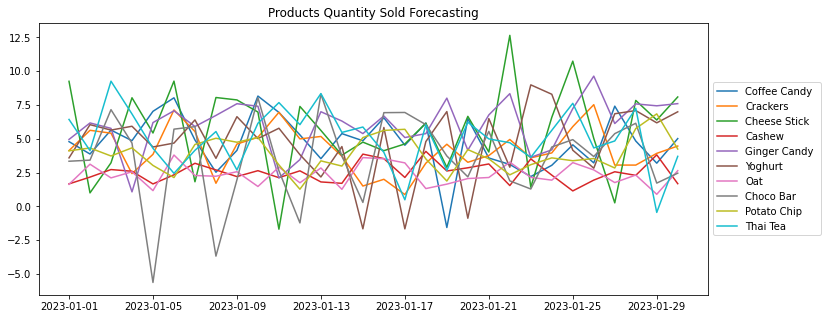

In [47]:
#Plot forecasting
plt.figure(figsize=(12,5))
# plt.plot(df_t)
plt.plot(dfp)
plt.legend(dfp.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Products Quantity Sold Forecasting')
plt.show()

In [48]:
#Products Quantity forecast
round(dfp.describe().T['mean'],0)

Coffee Candy     5.0
Crackers         4.0
Cheese Stick     6.0
Cashew           3.0
Ginger Candy     6.0
Yoghurt          5.0
Oat              2.0
Choco Bar        4.0
Potato Chip      4.0
Thai Tea         5.0
Name: mean, dtype: float64

From the above model results is Predicted daily quantities sold for each individual product

## **Clustering data preparation**

In [49]:
df_clustering = merged_data.groupby('customerid').agg({'transactionid':'count','qty':'sum','totalamount':'sum'})
df_clustering

,transactionid,qty,totalamount
customerid,,,
1,17,60,623300
2,12,56,382300
3,15,56,446200
4,10,46,302500
5,7,27,268600
...,...,...,...
442,13,37,269400
444,18,62,577700
445,17,62,530800


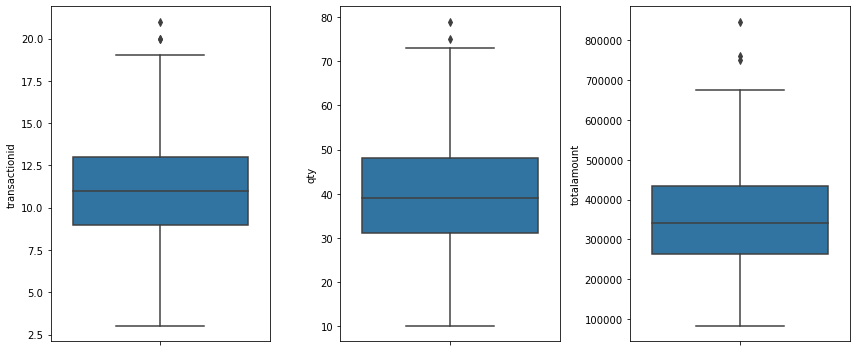

In [50]:
#Check outliers
features = df_clustering.columns
fig, ax = plt.subplots(1,len(df_clustering.columns),figsize=(12,5))
for i in range(0,len(df_clustering.columns)):
    sns.boxplot(data=df_clustering,y=features[i],ax=ax[i])
plt.tight_layout()
plt.show()

There aren't too many or significant outliers

In [56]:
#Standarisasi
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data
cluster_df_std = scaler.fit_transform(df_clustering.values)

# Convert the standardized data back to a DataFrame
cluster_df_std = pd.DataFrame(cluster_df_std, columns=df_clustering.columns)

# check the cluster_df_std data
cluster_df_std.head()

,transactionid,qty,totalamount
0,1.867907,1.592902,2.177885
1,0.321765,1.276707,0.233801
2,1.249450,1.276707,0.749265
3,-0.296692,0.486220,-0.409925
4,-1.224378,-1.015704,-0.683387


In [57]:
# check null values
df_std.isna().sum()

transactionid    0
qty              0
totalamount      0
dtype: int64

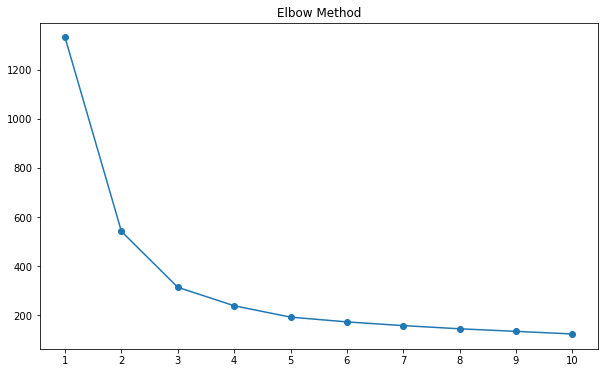

In [59]:
#Elbow method
from sklearn.cluster import KMeans

inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(df_std.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(10,6))
plt.xticks(list(range(1,11)))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method')
plt.show()

The best cluster (k) is 3 clusters

## KMeans Model

In [61]:
# make KMeans with n = 3
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0, n_init = 10)
clusters = kmeans_3.fit_predict(cluster_df_std)
df_clustering['cluster'] = clusters

# Display the DataFrame with the cluster labels
df_clustering.head()

,transactionid,qty,totalamount,cluster
customerid,,,,
1,17,60,623300,2
2,12,56,382300,2
3,15,56,446200,2
4,10,46,302500,0
5,7,27,268600,1


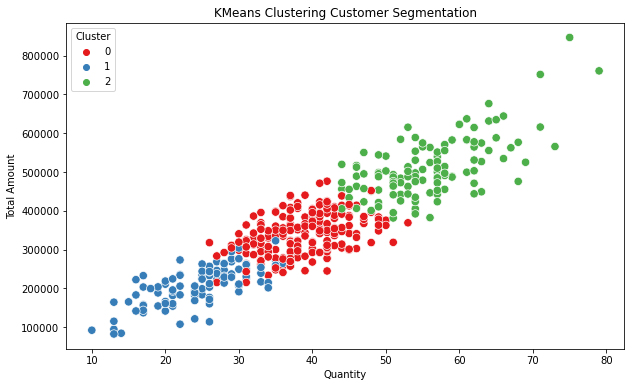

In [62]:
# Convert 'cluster' column to categorical data type
df_clustering['cluster'] = df_clustering['cluster'].astype('category')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='totalamount', data=df_clustering, hue='cluster', palette='Set1', s=70)
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

         transactionid        qty    totalamount
cluster                                         
0            10.790698  38.586047  338513.488372
1             7.036697  24.816514  210053.211009
2            14.825000  55.766667  509970.000000


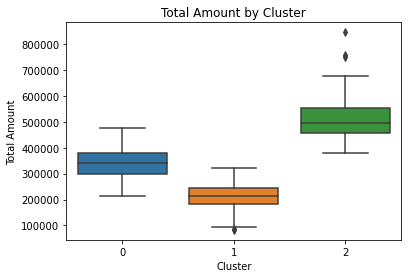

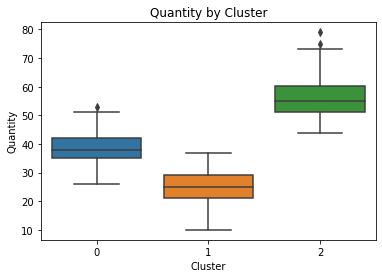

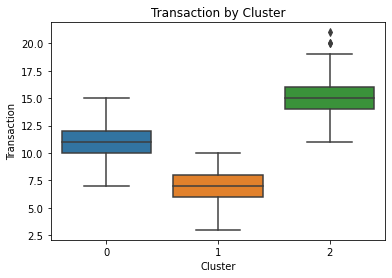

In [63]:
# checking cluster mean
cluster_mean = df_clustering.groupby('cluster').mean()
print(cluster_mean)

# Box Plot for total amount
sns.boxplot(data=df_clustering, x='cluster', y='totalamount')
plt.title('Total Amount by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Amount')
plt.show()

# Box Plot for Quantity
sns.boxplot(data=df_clustering, x='cluster', y='qty')
plt.title('Quantity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Quantity')
plt.show()

# Box Plot for Transaction
sns.boxplot(data=df_clustering, x='cluster', y='transactionid')
plt.title('Transaction by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Transaction')
plt.show()

### RFM Analysis for Customer Segmentation

In [66]:
#create rfm dataframe
rfm_df = merged_data.groupby('customerid').agg({'transactionid' : 'count',
                                          'qty' : 'sum',
                                          'totalamount' : 'sum',
                                       'date' : 'min'})
# check rfm dataframe info
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444 entries, 1 to 447
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  444 non-null    int64         
 1   qty            444 non-null    int64         
 2   totalamount    444 non-null    int64         
 3   date           444 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 17.3 KB


In [67]:
rfm_df.head()

,transactionid,qty,totalamount,date
customerid,,,,
1,17,60,623300,2022-01-07
2,12,56,382300,2022-01-03
3,15,56,446200,2022-01-02
4,10,46,302500,2022-02-18
5,7,27,268600,2022-04-12


In [68]:
# Calculate Recency
max_date = rfm_df['date'].max()
rfm_df['Recency'] = max_date - rfm_df['date']

# Calculate Frequency
frequency_df = rfm_df.groupby('customerid')['transactionid'].unique().reset_index()
frequency_df = frequency_df.rename(columns={'transactionid': 'Frequency'})
rfm_df = rfm_df.merge(frequency_df, on='customerid')
rfm_df['Frequency'] = rfm_df['Frequency'].astype(int)

# Calculate Monetary
monetary_df = rfm_df.groupby('customerid')['totalamount'].sum().reset_index()
monetary_df = monetary_df.rename(columns={'totalamount': 'Monetary'})
rfm_df = rfm_df.merge(monetary_df, on='customerid')
rfm_df['cluster'] = clusters
rfm_df['cluster'] = rfm_df['cluster'].astype('category')

In [69]:
# Group by cluster and calculate average RFM values for each cluster
rfm_analysis = rfm_df.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customerid': 'count'
}).reset_index()

# Rename column
rfm_analysis = rfm_analysis.rename(columns={
    'Recency': 'Average Recency',
    'Frequency': 'Average Frequency',
    'Monetary': 'Average Monetary',
    'customerid': 'Customer Count'
})
# Convert timedeltas to numeric values in days
rfm_analysis['Average Recency'] = rfm_analysis['Average Recency'].dt.days

# Display the RFM analysis for each cluster
rfm_analysis.head()

,cluster,Average Recency,Average Frequency,Average Monetary,Customer Count
0,0,158,10.790698,338513.488372,215
1,1,142,7.036697,210053.211009,109
2,2,167,14.825000,509970.000000,120


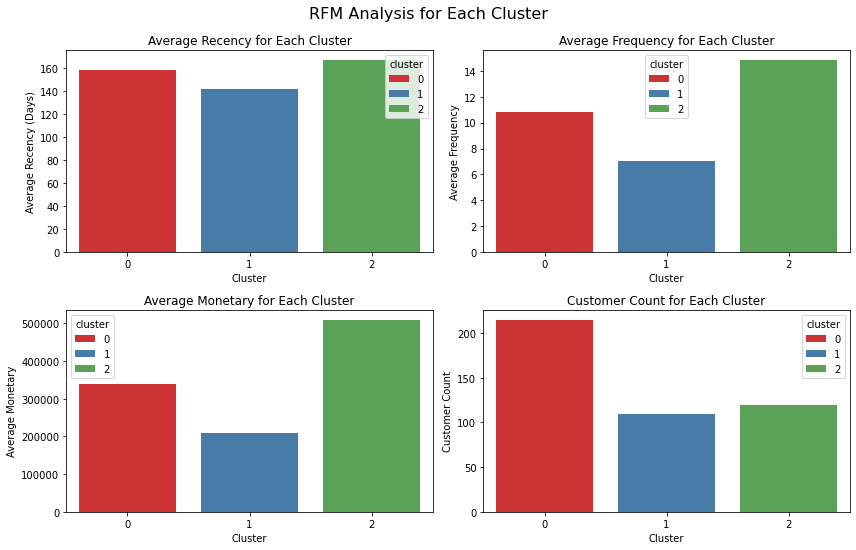

In [71]:
# Create a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot the average Recency for each cluster
sns.barplot(x='cluster', y='Average Recency', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[0, 0])
axes[0, 0].set_title('Average Recency for Each Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Average Recency (Days)')

# Plot the average Frequency for each cluster
sns.barplot(x='cluster', y='Average Frequency', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[0, 1])
axes[0, 1].set_title('Average Frequency for Each Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average Frequency')

# Plot the average Monetary for each cluster
sns.barplot(x='cluster', y='Average Monetary', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[1, 0])
axes[1, 0].set_title('Average Monetary for Each Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Monetary')

# Plot the customer count for each cluster
sns.barplot(x='cluster', y='Customer Count', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[1, 1])
axes[1, 1].set_title('Customer Count for Each Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Customer Count')

# Adjust the layout to avoid overlapping titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add a common title for the entire subplot
fig.suptitle('RFM Analysis for Each Cluster', fontsize=16)

# Show the plots
plt.show()

Analysis of each cluster:

Cluster 0:

    Average Recency (R): 158
    Average Frequency (F): 10.79
    Average Monetary (M): $338,513.49
    Customer Count: 215

Cluster 0 has a relatively high average recency, indicating that customers in this cluster have likely interacted with the business for a relatively long period. However, they have a high frequency of transactions (average of 10.79 transactions) and a high transaction value (average of $338,513.49). This suggests that they are loyal and valuable customers. The right strategy for this cluster may be to maintain their satisfaction with outstanding service and perhaps offer exclusive incentives as a reward for their loyalty.

Cluster 1:

    Average Recency (R): 142
    Average Frequency (F): 7.04
    Average Monetary (M): $210,053.21
    Customer Count: 109

Cluster 1 has a lower average recency than Cluster 0, indicating that they are newer in their interactions with our business. Their transaction frequency is also lower (average of 7.04 transactions), and their transaction value (average of $210,053.21) is lower than Cluster 0. Although they are not as numerous as Cluster 0, they are still a valuable customer segment. The strategy for this cluster may involve increasing their transaction frequency by offering special incentives or enhancing the value of your services.

Cluster 2:

    Average Recency (R): 167
    Average Frequency (F): 14.83
    Average Monetary (M): $509,970.00
    Customer Count: 120

Cluster 2 has the highest average recency, indicating that they are customers who have recently interacted with our business. Nevertheless, they have a very high transaction frequency (average of 14.83 transactions) and the highest transaction value (average of $509,970.00) among all clusters. This cluster likely consists of highly active customers who generate significant revenue for our business. The strategy for this cluster may involve maintaining their high activity levels and exploring opportunities to further increase transaction values.